<a href="https://colab.research.google.com/github/sriharisivashanmugam/BlowerFault/blob/main/Blower_Fault_v2_Jan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For every heater, regardless of period of data available, do feature engineering, normalize them temporally by period of data available and have 2 clusters faulty/non-fauly, analyze the two clusters for significant differences and try predicting new heaters in the clusters.

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [96]:
def had_fault(data):
  if 'E1.0' in set(data['ErrorCode']):
    return True
  else:
    return False

def number_of_unique_faults(data):
  data['lag_error'] = data['ErrorCode'].shift(-1)
  return data[(data['ErrorCode']=='E1.0') & (data['lag_error']!='E1.0')].shape[0]

def get_stats(data):
  mean_pwm = temp['BlowerPWM'].mean()
  mean_rpm = temp['BlowerRPM'].mean()
  mean_fr = temp['FiringRate'].mean()
  mean_ft = temp['FlueTemperature'].mean()
  max_pwm = temp['BlowerPWM'].max()
  max_rpm = temp['BlowerRPM'].max()
  max_fr = temp['FiringRate'].max()
  max_ft = temp['FlueTemperature'].max()

  return mean_pwm,mean_rpm,mean_fr,mean_ft,max_pwm,max_rpm,max_fr,max_ft

def get_agg(data):
  pass


In [155]:
new_df = {'HEX':[],'mean_pwm':[],'mean_rpm':[],'mean_fr':[],'mean_ft':[],'max_pwm':[],'max_rpm':[],'max_fr':[],'max_ft':[],'had_fault':[]}
for i in os.listdir('/content/drive/MyDrive/Predictive Models/Blower Fault Phase 2/Hex_with_blowerFault-training/Hex_with_blowerFault/'):
  temp = pd.read_csv('/content/drive/MyDrive/Predictive Models/Blower Fault Phase 2/Hex_with_blowerFault-training/Hex_with_blowerFault/'+i)
  temp = temp[['BlowerPWM','BlowerRPM','FiringRate','FlueTemperature','ErrorCode']]

  new_df['HEX'].append(i.split('.')[0])
  res = get_stats(temp)
  # print(i,had_fault(temp),number_of_unique_faults(temp),res)
  # print(i)
  new_df['mean_pwm'].append(res[0])
  new_df['mean_rpm'].append(res[1])
  new_df['mean_fr'].append(res[2])
  new_df['mean_ft'].append(res[3])
  new_df['max_pwm'].append(res[4])
  new_df['max_rpm'].append(res[5])
  new_df['max_fr'].append(res[6])
  new_df['max_ft'].append(res[7])
  new_df['had_fault'].append(had_fault(temp))

new_df = pd.DataFrame(new_df)

In [156]:
new_df = new_df[new_df['max_rpm']>0]

In [157]:
new_df.describe()

,mean_pwm,mean_rpm,mean_fr,mean_ft,max_pwm,max_rpm,max_fr,max_ft
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,219.996326,5985.881211,14.213829,103.330972,364.435897,8560.589744,206.230769,129.512821
std,61.980191,1107.314408,7.859449,6.887047,32.109840,386.846816,58.084993,6.616852
min,112.412980,4140.145461,0.254323,90.021420,311.000000,7811.000000,76.000000,117.000000
25%,181.205468,5106.247533,7.863295,97.018475,350.000000,8334.500000,164.500000,125.000000
50%,233.843648,6001.618620,14.898549,104.585277,356.000000,8405.000000,251.000000,131.000000
75%,262.791346,6878.390504,20.676717,109.379103,377.000000,8788.500000,251.000000,133.500000
max,316.604897,7788.624666,28.359846,113.099800,450.000000,9425.000000,251.000000,144.000000


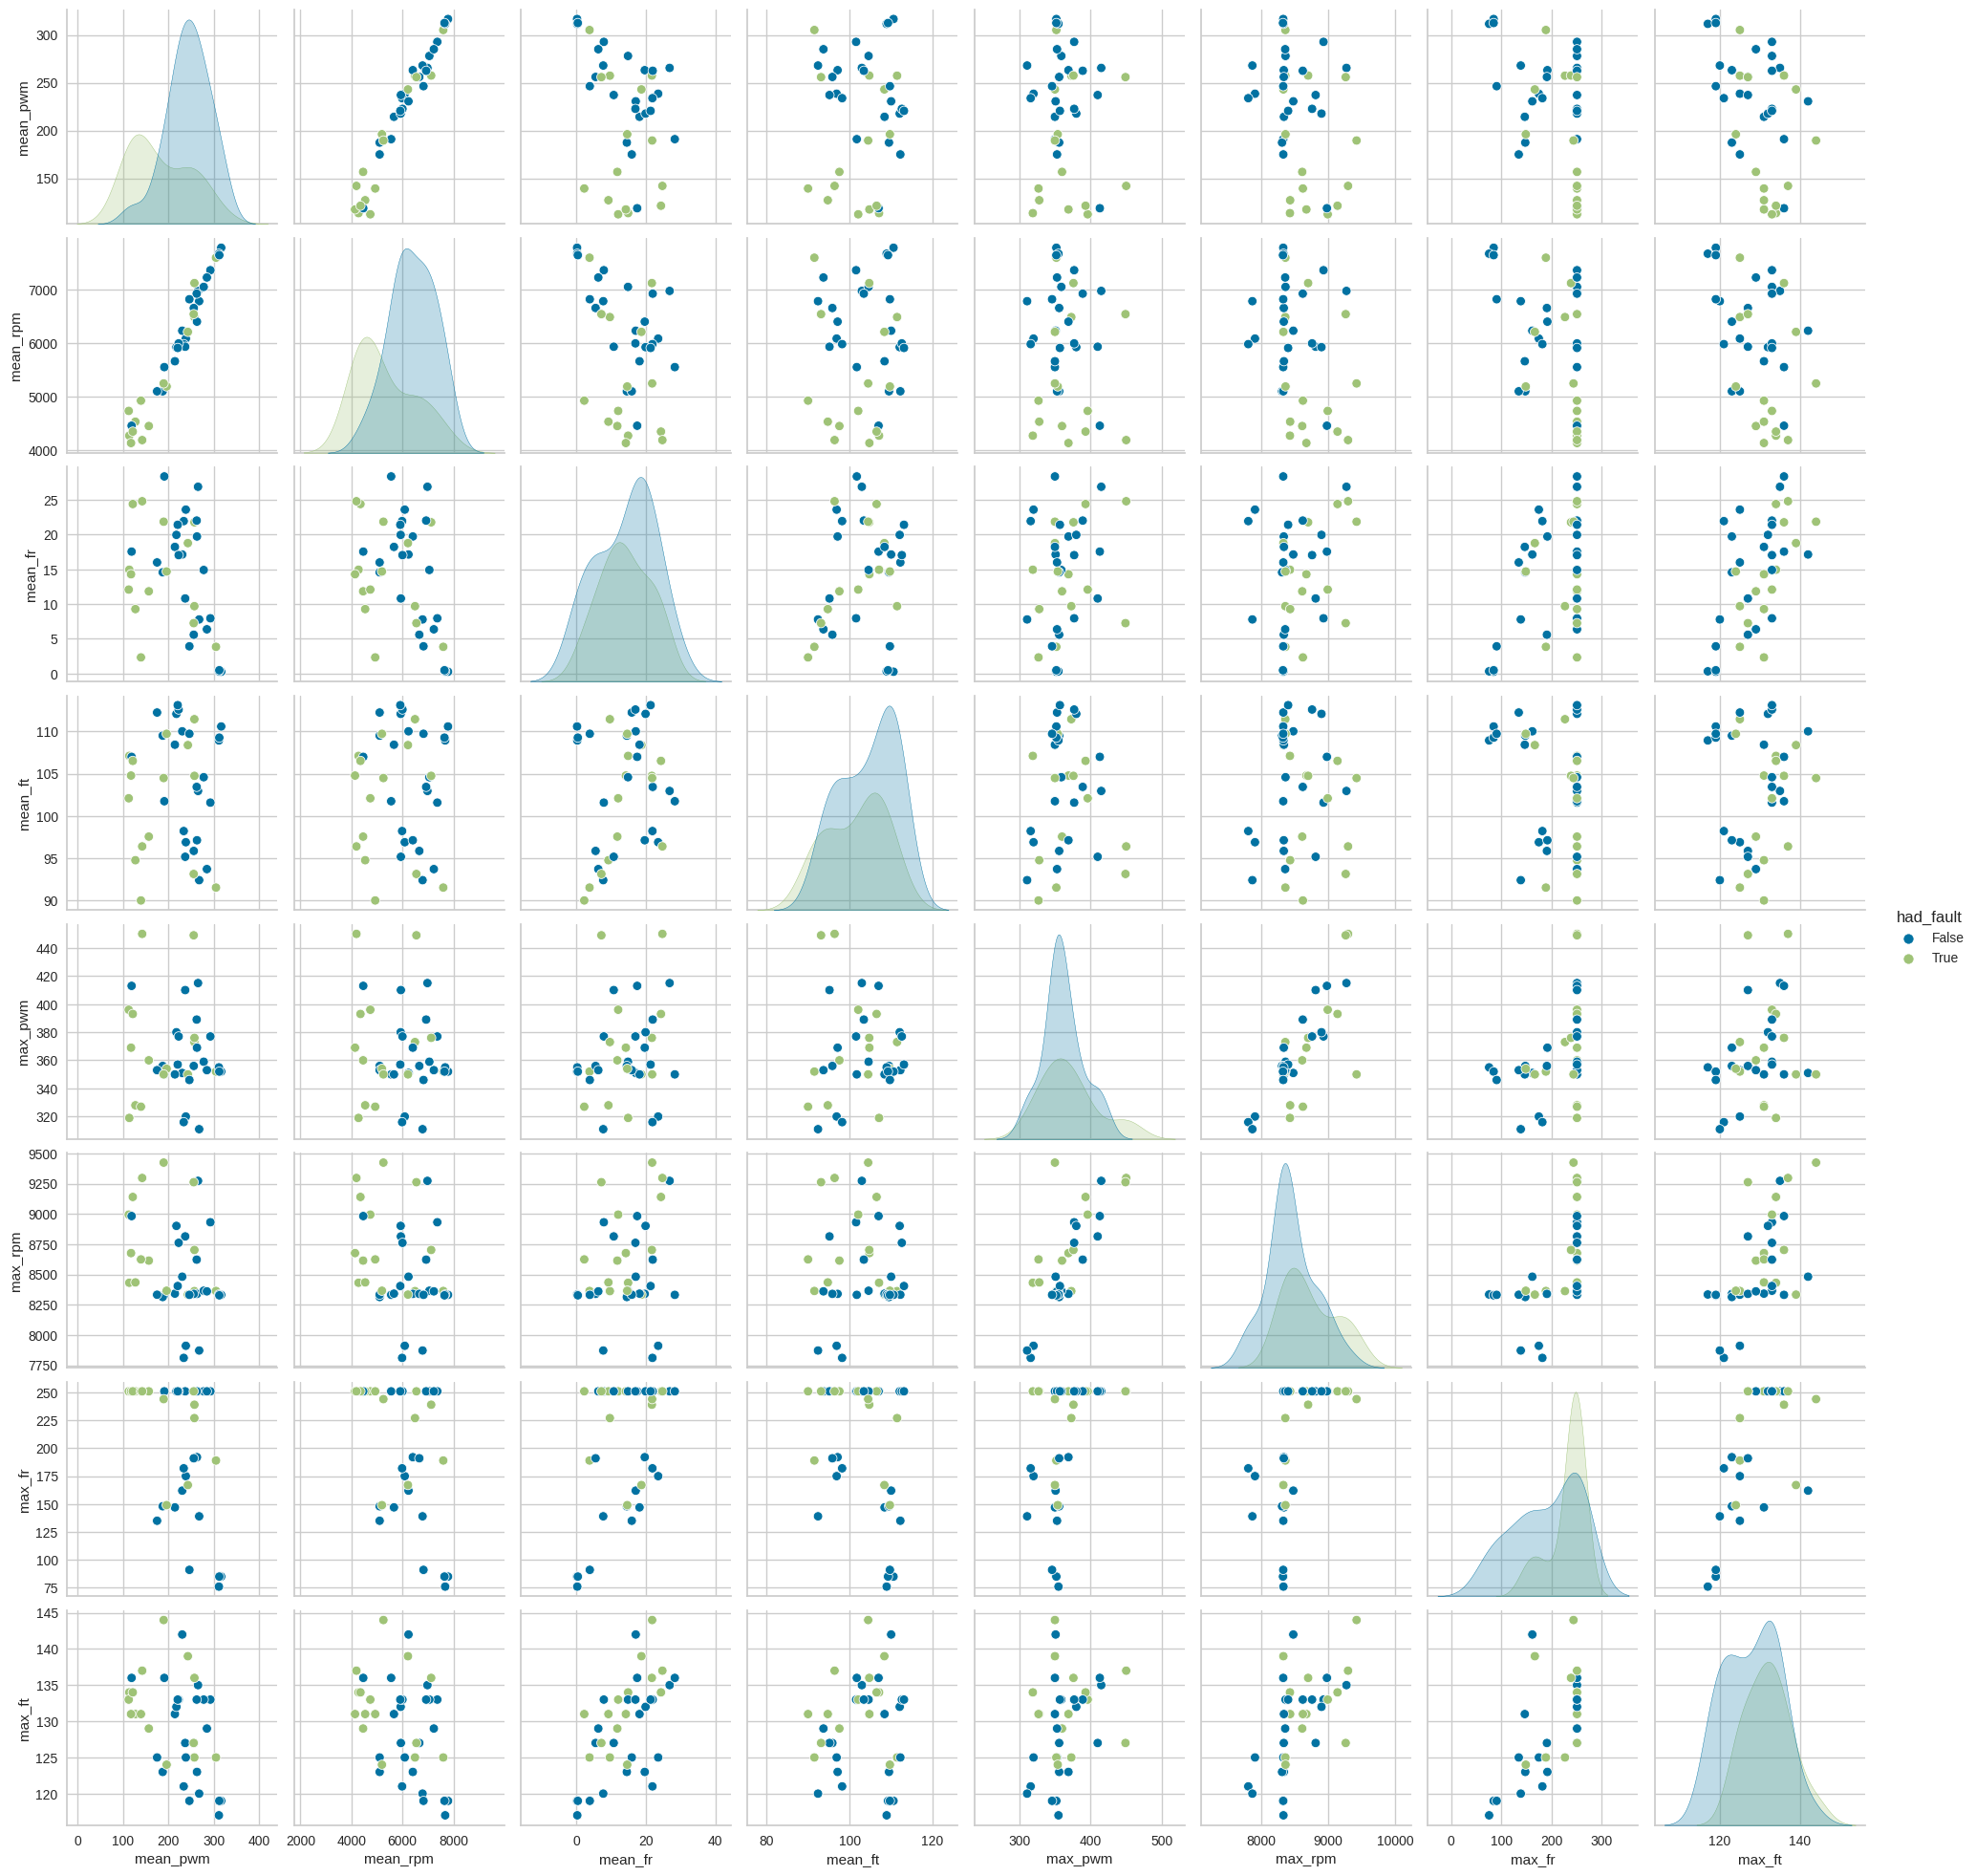

In [159]:
sns.pairplot(new_df,hue='had_fault')

In [ ]:
#pca

#normalize the features

#Build models

In [160]:
# pip install pycaret

In [161]:
from pycaret.classification import *
s = setup(new_df, target = 'had_fault', session_id = 124)

,Description,Value
0,Session id,124
1,Target,had_fault
2,Target type,Binary
3,Original data shape,"(39, 10)"
4,Transformed data shape,"(39, 10)"
5,Transformed train set shape,"(27, 10)"
6,Transformed test set shape,"(12, 10)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


In [162]:
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6500,0.8000,0.4000,0.2833,0.3167,0.2400,0.2500,0.1060
rf,Random Forest Classifier,0.6167,0.7250,0.0000,0.0000,0.0000,0.0000,0.0000,0.2520
knn,K Neighbors Classifier,0.5833,0.6000,0.4000,0.2333,0.2833,0.1300,0.1500,0.0830
et,Extra Trees Classifier,0.6167,0.6000,0.1000,0.0500,0.0667,0.0400,0.0500,0.2680
xgboost,Extreme Gradient Boosting,0.6167,0.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0880
lr,Logistic Regression,0.6167,0.5000,0.3000,0.2000,0.2333,0.1300,0.1500,0.1310
dt,Decision Tree Classifier,0.6167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1130
ada,Ada Boost Classifier,0.6167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0770
gbc,Gradient Boosting Classifier,0.6167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1850
lda,Linear Discriminant Analysis,0.6167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1340


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

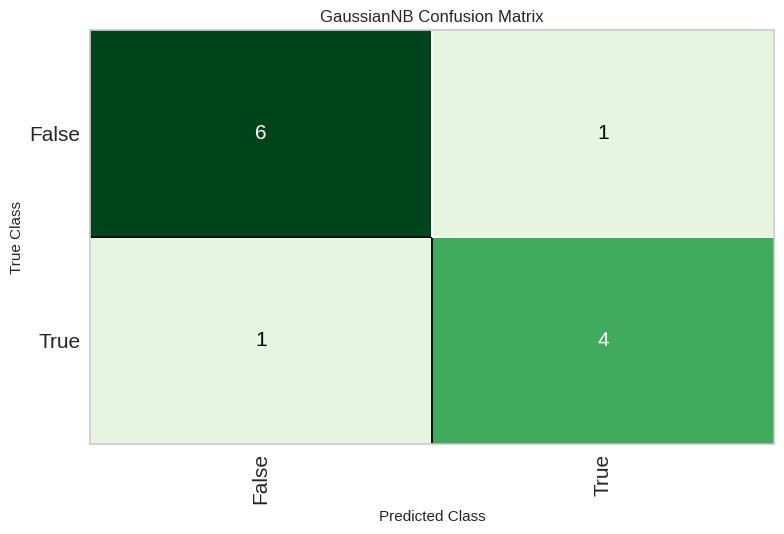

In [163]:
plot_model(best, plot = 'confusion_matrix')

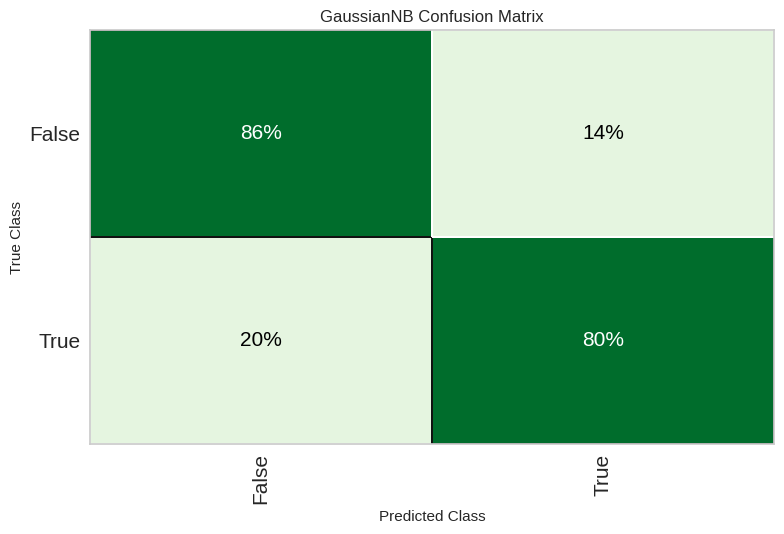

In [164]:
plot_model(best, plot = 'confusion_matrix',plot_kwargs={'percent':True})

In [165]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8333,0.8286,0.8000,0.8000,0.8000,0.6571,0.6571


,HEX,mean_pwm,mean_rpm,mean_fr,mean_ft,max_pwm,max_rpm,max_fr,max_ft,had_fault,prediction_label,prediction_score
0,iQ100101081865_HEX_4,265.456940,6981.545898,26.874510,102.961494,415.0,9274.0,251.0,135.0,False,1,0.7867
6,iQ100104041804_HEX_1,112.412979,4739.878418,12.077547,102.095436,396.0,8995.0,251.0,133.0,True,1,0.9894
18,iQ100106081845_HEX_2,230.557922,6238.236816,17.128477,110.010506,351.0,8482.0,162.0,142.0,False,0,0.9830
24,iQ100109201840_HEX_1,305.095856,7602.298340,3.839603,91.542641,352.0,8364.0,189.0,125.0,True,0,0.9990
14,iQ100104202108_HEX_1,263.093903,6407.416992,19.718929,97.134636,369.0,8340.0,192.0,123.0,False,0,0.9940
2,iQ100101081865_HEX_2,190.991714,5558.196289,28.359846,101.746048,350.0,8332.0,251.0,136.0,False,0,0.6714
7,iQ100104051807_HEX_1,127.120125,4538.714844,9.269998,94.776581,328.0,8435.0,251.0,131.0,True,1,0.8402
26,iQ100108151811_HEX_3,256.012146,6662.412109,5.579682,95.873413,356.0,8340.0,191.0,127.0,False,0,0.9939
31,iQ100101051864_HEX_2,217.699753,5931.267578,19.950262,112.069374,380.0,8902.0,251.0,132.0,False,0,0.5552
38,iQ100101021861_HEX_1,246.370697,6826.199707,3.914342,109.718460,346.0,8332.0,91.0,119.0,False,0,1.0000


In [166]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Testing the model

In [167]:
test_df = {'HEX':[],'mean_pwm':[],'mean_rpm':[],'mean_fr':[],'mean_ft':[],'max_pwm':[],'max_rpm':[],'max_fr':[],'max_ft':[],'had_fault':[]}
for i in os.listdir('/content/drive/MyDrive/Predictive Models/Blower Fault Phase 2/Hex_with_blowerFault/'):
  temp = pd.read_csv('/content/drive/MyDrive/Predictive Models/Blower Fault Phase 2/Hex_with_blowerFault/'+i)
  temp = temp[['BlowerPWM','BlowerRPM','FiringRate','FlueTemperature','ErrorCode']]

  test_df['HEX'].append(i.split('.')[0])
  res = get_stats(temp)
  # print(i)
  # print(i,had_fault(temp),number_of_unique_faults(temp),res)
  test_df['mean_pwm'].append(res[0])
  test_df['mean_rpm'].append(res[1])
  test_df['mean_fr'].append(res[2])
  test_df['mean_ft'].append(res[3])
  test_df['max_pwm'].append(res[4])
  test_df['max_rpm'].append(res[5])
  test_df['max_fr'].append(res[6])
  test_df['max_ft'].append(res[7])
  test_df['had_fault'].append(had_fault(temp))

test_df = pd.DataFrame(test_df)

In [168]:
test_df = test_df[~test_df['HEX'].isin(new_df['HEX'])]

In [169]:
predictions = predict_model(best, data=test_df, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5119,0.5929,0.7059,0.4364,0.5393,0.0782,0.0887


,HEX,mean_pwm,mean_rpm,mean_fr,mean_ft,max_pwm,max_rpm,max_fr,max_ft,had_fault,prediction_label,prediction_score_0,prediction_score_1
0,iQ100110241866_HEX_1,149.373520,4469.896973,18.121126,93.062477,450.0,9315.0,251.0,142.0,False,1,0.0001,0.9999
1,iQ100110241866_HEX_2,170.410034,5030.215332,26.921366,95.088203,450.0,9270.0,254.0,139.0,True,1,0.0004,0.9996
3,iQ100110241866_HEX_4,157.188202,4627.497070,33.909840,98.196663,450.0,9314.0,254.0,155.0,True,1,0.0012,0.9988
16,iQ100106071844_HEX_1,282.043274,7035.493652,19.955294,107.263168,367.0,8342.0,251.0,144.0,True,0,0.9783,0.0217
20,iQ100106081845_HEX_1,217.041656,5872.157715,25.329458,111.998695,350.0,8345.0,196.0,137.0,True,0,0.9299,0.0701


In [170]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predictions['had_fault'],predictions['prediction_label']))

[[19 31]
 [10 24]]
